<a href="https://colab.research.google.com/github/Fadelhamkaa/ML_Project_Anomaly-Detection-in-Fradu-Card-Detection/blob/main/Projek_ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# **Load Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv/creditcard.csv')

# **Eksplorasi Data**

In [ ]:
print("Informasi Dataset:")
print(data.info())
print("\nStatistik Deskriptif:")
print(data.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  floa

# **Pisahkan Fitur dan Label**

In [ ]:
X = data.drop(['Class', 'Amount'], axis=1)
y = data['Class']  # Label

# **Latih Model Isolation Forest**

In [ ]:
model = IsolationForest(contamination=0.01, random_state=42)  # 1% anomali
model.fit(X)

IsolationForest(contamination=0.01, random_state=42)

# **Prediksi Anomali**

In [ ]:
y_pred = model.predict(X)
# Anomali ditandai dengan -1, data normal ditandai dengan 1
y_pred = [1 if x == -1 else 0 for x in y_pred]  # Ubah -1 menjadi 1 (anomali)

# **Evaluasi Model**

In [ ]:
print("\nLaporan Klasifikasi:")
print(classification_report(y, y_pred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.11      0.65      0.19       492

    accuracy                           0.99    284807
   macro avg       0.56      0.82      0.59    284807
weighted avg       1.00      0.99      0.99    284807



# **Visualisasi anomali**

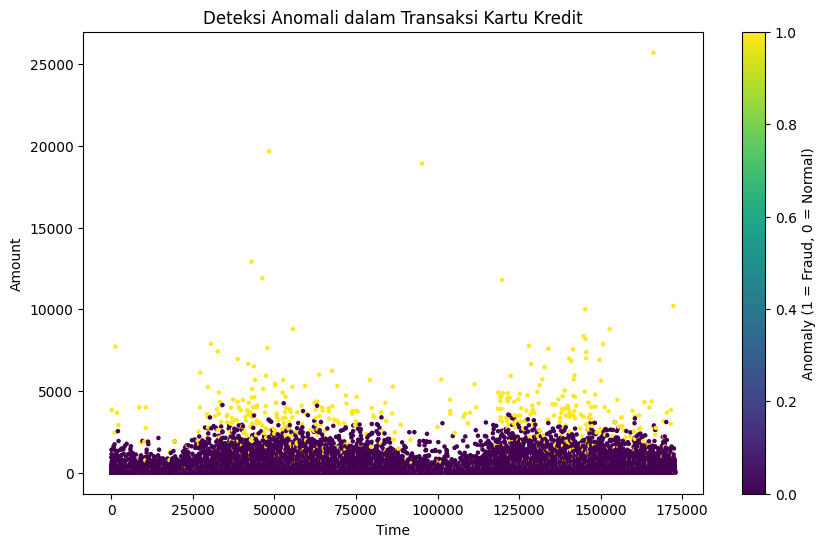

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Time'], data['Amount'], c=y_pred, cmap='viridis', marker='o', s=5) # Use 'Amount' directly
plt.title('Deteksi Anomali dalam Transaksi Kartu Kredit')
plt.xlabel('Time')
plt.ylabel('Amount') # Updated y-axis label
plt.colorbar(label='Anomaly (1 = Fraud, 0 = Normal)')
plt.show()

# **Visualisasi Jumlah Transaksi Normal dan Penipuan**

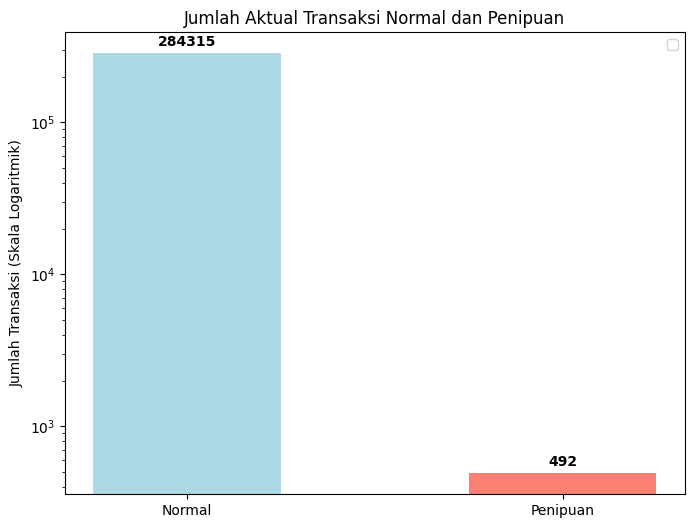

In [ ]:
# Bar Chart (Actual Counts Only) with Logarithmic Scale
total_normal = np.sum(y == 0)
total_fraud = np.sum(y == 1)

labels = ['Normal', 'Penipuan']
actual_counts = [total_normal, total_fraud]

x = np.arange(len(labels))
width = 0.5  # Increased bar width for better visibility

fig, ax = plt.subplots(figsize=(8, 6)) # Increased figure size for better readability
bars1 = ax.bar(x, actual_counts, width, color=['lightblue', 'salmon']) # Color coded bars

ax.set_ylabel('Jumlah Transaksi (Skala Logaritmik)') # Updated y-axis label
ax.set_title('Jumlah Aktual Transaksi Normal dan Penipuan')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_yscale('log') # Apply logarithmic scale

#Improved annotation for better readability
def add_labels(bars):
    for bar, count in zip(bars, actual_counts):
        height = bar.get_height()
        ax.annotate(f'{count}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, weight='bold') # Added fontsize and weight for better visibility

add_labels(bars1)

plt.show()